In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Science/TrafficIndex_19Jun2022-26Jun2022.csv')
df

,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50
...,...,...,...,...
63,64,Singapore,5.23,42.93
64,65,Helsinki,4.67,22.43
65,66,Turin,4.29,46.20
66,67,Valencia,3.40,31.97


In [3]:
from geopy.geocoders import Nominatim
import pandas as pd

# Baca dataset CSV
data = pd.read_csv('/content/drive/MyDrive/Data Science/TrafficIndex_19Jun2022-26Jun2022.csv')

# Inisialisasi geolocator
geolocator = Nominatim(user_agent="traffic")

# Fungsi untuk mendapatkan koordinat dari kota
def get_coordinates(row):
    location = geolocator.geocode(row['City'])
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Tambah kolom latitude dan longitude ke dalam dataset
data['Latitude'], data['Longitude'] = zip(*data.apply(get_coordinates, axis=1))

# Simpan dataset yang telah diperbarui
data.to_csv('lat-long-traffic.csv', index=False)


In [4]:
df = pd.read_csv("lat-long-traffic.csv")
df

,Rank,City,AverageTCI,MaxTCI,Latitude,Longitude
0,1,Lagos,60.16,130.21,6.455057,3.394179
1,2,Riga,47.12,87.51,56.949398,24.105185
2,3,Mumbai,38.37,153.41,18.973354,72.828105
3,4,Tehran,38.20,110.12,35.689252,51.389600
4,5,London,38.16,128.50,51.489334,-0.144055
...,...,...,...,...,...,...
63,64,Singapore,5.23,42.93,1.357107,103.819499
64,65,Helsinki,4.67,22.43,60.167488,24.942747
65,66,Turin,4.29,46.20,45.067755,7.682489
66,67,Valencia,3.40,31.97,39.469707,-0.376335


In [5]:
import pandas as pd
import geopandas as gpd

geo_df = pd.read_csv('lat-long-traffic.csv')
geo_convert = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df['Longitude'], geo_df['Latitude']))
geo_convert.head()

,Rank,City,AverageTCI,MaxTCI,Latitude,Longitude,geometry
0,1,Lagos,60.16,130.21,6.455057,3.394179,POINT (3.39418 6.45506)
1,2,Riga,47.12,87.51,56.949398,24.105185,POINT (24.10518 56.94940)
2,3,Mumbai,38.37,153.41,18.973354,72.828105,POINT (72.82810 18.97335)
3,4,Tehran,38.20,110.12,35.689252,51.389600,POINT (51.38960 35.68925)
4,5,London,38.16,128.50,51.489334,-0.144055,POINT (-0.14406 51.48933)


<Axes: >

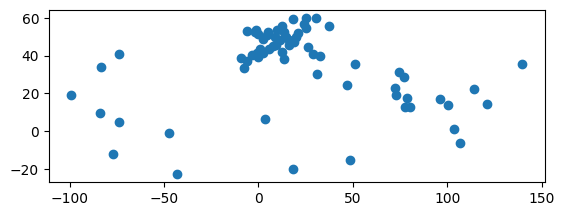

In [6]:
geo_convert.plot()

<Axes: >

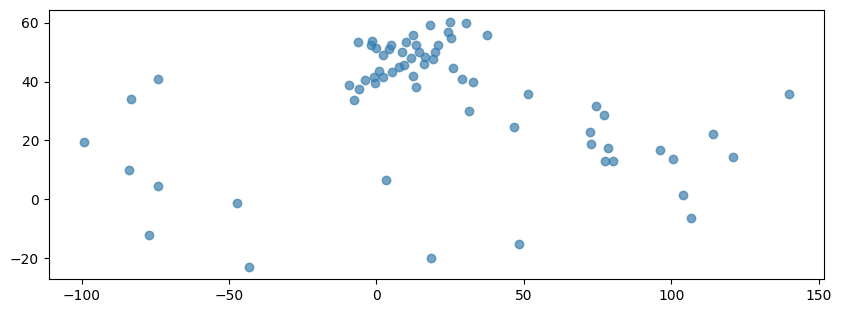

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
geo_convert.plot(ax=ax, color='lightgrey', zorder=1)
geo_convert.plot(ax=ax, alpha=0.5, zorder=2)

<ipython-input-8-90c70a881cf8>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

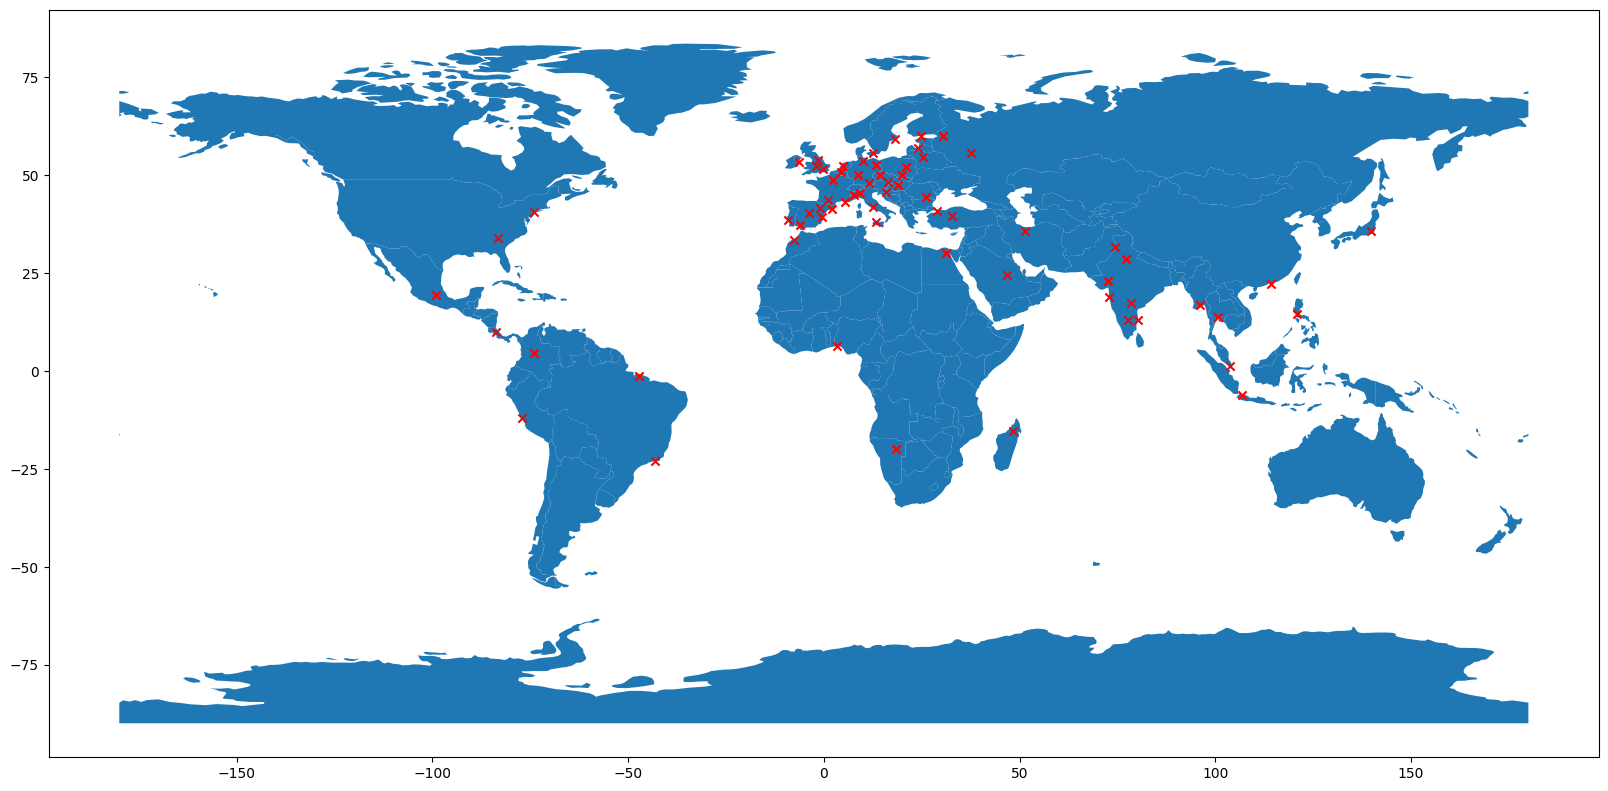

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_convert.plot(ax=world.plot(figsize=(20, 10)), marker='x', color='red', markersize=35)